In [5]:
import numpy as np
import arviz as az
import math
# import pymc3 as pm
import pickle
import matplotlib.pyplot as plt
from google.protobuf import text_format
from scipy.stats import multivariate_normal as mvn
from scipy.stats import skewnorm
from scipy.stats import norm
from scipy.interpolate import griddata
import pp_mix.protos.py.params_pb2 as params_pb2

from pp_mix.interface import ConditionalMCMC, cluster_estimate
from pp_mix.utils import loadChains, to_numpy, to_proto
from pp_mix.protos.py.state_pb2 import MultivariateMixtureState, EigenVector, EigenMatrix
from pp_mix.protos.py.params_pb2 import Params

In [2]:
import pandas as pd
with open("data/data_by_rule_student/p_50_d_2_M_4_nperclus_50_data.csv", newline='') as my_csv:
    data = pd.read_csv(my_csv, sep=',', header=None).values
    
print(data.shape)

(200, 50)


In [24]:
import pandas as pd
p = 50
d = 2
M = 4
n_percluster_s = [50]

log_every = 1000
ntrick = 7000
nburn = 20000
niter = 20000
thin = 5

#for n_pc in n_percluster_s:
n_pc=50

print("Running p=50 d=2 M=4 nperclus={0}".format(n_pc))
with open("data/data_by_rule_student/p_50_d_2_M_4_nperclus_{0}_data.csv".format(n_pc), newline='') as my_csv:
    data = pd.read_csv(my_csv, sep=',', header=None).values

ranges = np.array([[-50,50],]*d).transpose()

#sampler = ConditionalMCMC(params_file = "data/data_by_rule_student/params_compare_CD/c50_s8_sp_p_50_d_2_M_4_n_50_N_30.asciipb")
#sampler.run(ntrick, nburn, niter, thin, data, ranges, log_every)
#sampler.serialize_chains("data/data_by_rule_student/chains_compare_CD/chains_c50_s8_p_50_d_2_M_4_nperclus_50_N_30.recordio")
#acc_rates = np.array([sampler.means_ar, sampler.lambda_ar])
#np.savetxt("data/data_by_rule_student/chains_compare_CD/acc_rate_c50_s8_p_50_d_2_M_4_nperclus_50_N_30.csv", acc_rates, delimiter=",")


#sampler0 = ConditionalMCMC(params_file = "data/data_by_rule_student/params_compare_CD/c50_s95_sp_p_50_d_2_M_4_n_50_N_30.asciipb")
#sampler0.run(ntrick, nburn, niter, thin, data, ranges, log_every)
#sampler0.serialize_chains("data/data_by_rule_student/chains_compare_CD/chains_c50_s95_p_50_d_2_M_4_nperclus_50_N_30.recordio")
#acc_rates0 = np.array([sampler0.means_ar, sampler0.lambda_ar])
#np.savetxt("data/data_by_rule_student/chains_compare_CD/acc_rate_c50_s95_p_50_d_2_M_4_nperclus_50_N_30.csv", acc_rates0, delimiter=",")


sampler1 = ConditionalMCMC(params_file = "data/data_by_rule_student/params_compare_CD/sp_p_50_d_2_M_4_n_50_N_30.asciipb")
sampler1.run(ntrick, nburn, niter, thin, data, ranges, log_every)
sampler1.serialize_chains("data/data_by_rule_student/chains_compare_CD/chains_p_50_d_2_M_4_nperclus_50_N_30.recordio")
acc_rates1 = np.array([sampler1.means_ar, sampler1.lambda_ar])
np.savetxt("data/data_by_rule_student/chains_compare_CD/acc_rate_p_50_d_2_M_4_nperclus_50_N_30.csv", acc_rates1, delimiter=",")


#sampler2 = ConditionalMCMC(params_file = "data/data_by_rule_student/params_compare_CD/sp_p_50_d_2_M_4_n_50_N_30_sec.asciipb")
#sampler2.run(ntrick, nburn, niter, thin, data, ranges, log_every)
#sampler2.serialize_chains("data/data_by_rule_student/chains_compare_CD/chains_p_50_d_2_M_4_nperclus_50_N_30_sec.recordio")
#acc_rates2 = np.array([sampler2.means_ar, sampler2.lambda_ar])
#np.savetxt("data/data_by_rule_student/chains_compare_CD/acc_rate_p_50_d_2_M_4_nperclus_50_N_30_sec.csv", acc_rates2, delimiter=",")


#sampler3 = ConditionalMCMC(params_file = "data/data_by_rule_student/params_compare_CD/sp_p_50_d_2_M_4_n_50_N_15.asciipb")
#sampler3.run(ntrick, nburn, niter, thin, data, ranges, log_every)
#sampler3.serialize_chains("data/data_by_rule_student/chains_compare_CD/chains_p_50_d_2_M_4_nperclus_50_N_15.recordio")
#acc_rates3 = np.array([sampler3.means_ar, sampler3.lambda_ar])
#np.savetxt("data/data_by_rule_student/chains_compare_CD/acc_rate_p_50_d_2_M_4_nperclus_50_N_15.csv", acc_rates3, delimiter=",")


#sampler4 = ConditionalMCMC(params_file = "data/data_by_rule/params_compare_CD/sp_p_50_d_2_M_4_n_50_N_15_sec.asciipb")
#sampler4.run(ntrick, nburn, niter, thin, data, ranges, log_every)
#sampler4.serialize_chains("data/data_by_rule/chains_compare_CD/chains_p_50_d_2_M_4_nperclus_50_N_15_sec.recordio")
#acc_rates4 = np.array([sampler4.means_ar, sampler4.lambda_ar])
#np.savetxt("data/data_by_rule/chains_compare_CD/acc_rate_p_50_d_2_M_4_nperclus_50_N_15_sec.csv", acc_rates4, delimiter=",")


Running p=50 d=2 M=4 nperclus=50
Number means in trick phase:  10
Trick, iter # 1000  /  7000
Trick, iter # 2000  /  7000
Trick, iter # 3000  /  7000
Trick, iter # 4000  /  7000
Trick, iter # 5000  /  7000
Trick, iter # 6000  /  7000
Trick, iter # 7000  /  7000
Burnin, iter # 1000  /  20000
Burnin, iter # 2000  /  20000
Burnin, iter # 3000  /  20000
Burnin, iter # 4000  /  20000
Burnin, iter # 5000  /  20000
Burnin, iter # 6000  /  20000
Burnin, iter # 7000  /  20000
Burnin, iter # 8000  /  20000
Burnin, iter # 9000  /  20000
Burnin, iter # 10000  /  20000
Burnin, iter # 11000  /  20000
Burnin, iter # 12000  /  20000
Burnin, iter # 13000  /  20000
Burnin, iter # 14000  /  20000
Burnin, iter # 15000  /  20000
Burnin, iter # 16000  /  20000
Burnin, iter # 17000  /  20000
Burnin, iter # 18000  /  20000
Burnin, iter # 19000  /  20000
Burnin, iter # 20000  /  20000
Running, iter # 1000  /  20000
Running, iter # 2000  /  20000
Running, iter # 3000  /  20000
Running, iter # 4000  /  20000
Run

In [25]:
chain50N30 = loadChains("data/data_by_rule_student/chains_compare_CD/chains_p_50_d_2_M_4_nperclus_50_N_30.recordio", MultivariateMixtureState)
#chain50N30_sec = loadChains("data/data_by_rule_student/chains_compare_CD/chains_p_50_d_2_M_4_nperclus_50_N_30_sec.recordio", MultivariateMixtureState)
#chain50N15 = loadChains("data/data_by_rule_student/chains_compare_CD/chains_p_50_d_2_M_4_nperclus_50_N_15.recordio", MultivariateMixtureState)
#chain50N15_sec = loadChains("data/data_by_rule/chains_compare_CD/chains_p_50_d_2_M_4_nperclus_50_N_15_sec.recordio", MultivariateMixtureState)

chain50N30_c50 = loadChains("data/data_by_rule_student/chains_compare_CD/chains_c50_s8_p_50_d_2_M_4_nperclus_50_N_30.recordio", MultivariateMixtureState)
#chain50N30_c50_s95 = loadChains("data/data_by_rule_student/chains_compare_CD/chains_c50_s95_p_50_d_2_M_4_nperclus_50_N_30.recordio", MultivariateMixtureState)


#chain200 = loadChains("data/data_by_rule/chains_compare_CD/chains_p_50_d_2_M_4_nperclus_200.recordio", MultivariateMixtureState)


In [26]:
nc_chain50N30 = np.array([x.ma for x in chain50N30])
nonall_50N30 = np.array([x.mna for x in chain50N30])

#nc_chain200 = np.array([x.ma for x in chain200])
#nonall_200 = np.array([x.mna for x in chain200])

print(nc_chain50N30.mean())
print(nonall_50N30.mean())


nc_chain50N30_c50 = np.array([x.ma for x in chain50N30_c50])
nonall_50N30_c50 = np.array([x.mna for x in chain50N30_c50])
print(nc_chain50N30_c50.mean())
print(nonall_50N30_c50.mean())

nc_chain50N30_c50_s95 = np.array([x.ma for x in chain50N30_c50_s95])
nonall_50N30_c50_s95 = np.array([x.mna for x in chain50N30_c50_s95])
print(nc_chain50N30_c50_s95.mean())
print(nonall_50N30_c50_s95.mean())


4.01675
0.52075
4.08575
0.67675
4.002666666666666
0.7933333333333333


In [27]:
nc_chain50N30 = np.array([x.ma for x in chain50N30])
nonall_50N30 = np.array([x.mna for x in chain50N30])

#nc_chain200 = np.array([x.ma for x in chain200])
#nonall_200 = np.array([x.mna for x in chain200])

print(nc_chain50N30.mean())
print(nonall_50N30.mean())

#print(nc_chain200.mean())
#print(nonall_200.mean())


nc_chain50N30_sec = np.array([x.ma for x in chain50N30_sec])
nonall_50N30_sec = np.array([x.mna for x in chain50N30_sec])
print(nc_chain50N30_sec.mean())
print(nonall_50N30_sec.mean())


nc_chain50N15 = np.array([x.ma for x in chain50N15])
nonall_50N15 = np.array([x.mna for x in chain50N15])
print(nc_chain50N15.mean())
print(nonall_50N15.mean())


nc_chain50N15_sec = np.array([x.ma for x in chain50N15_sec])
nonall_50N15_sec = np.array([x.mna for x in chain50N15_sec])
print(nc_chain50N15_sec.mean())
print(nonall_50N15_sec.mean())


4.01675
0.52075


NameError: name 'chain50N30_sec' is not defined

In [8]:
chain50N15[-1].clus_alloc
#chain200[-1].clus_alloc

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]

# check chain mixing on some variables 

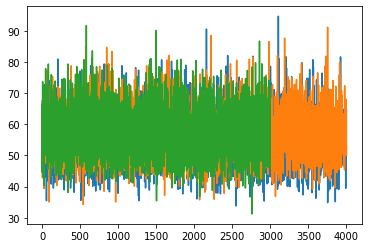

In [28]:
tau_chain50N30 = np.array([x.lamb_block.tau for x in chain50N30])
plt.plot(tau_chain50N30)

tau_chain50N30_c50 = np.array([x.lamb_block.tau for x in chain50N30_c50])
plt.plot(tau_chain50N30_c50)

tau_chain50N30_c50_s95 = np.array([x.lamb_block.tau for x in chain50N30_c50_s95])
plt.plot(tau_chain50N30_c50_s95)


In [7]:
tau_chain50N30 = np.array([x.lamb_block.tau for x in chain50N30])
tau_chain50N30_sec = np.array([x.lamb_block.tau for x in chain50N30_sec])
tau_chain50N15 = np.array([x.lamb_block.tau for x in chain50N15])
tau_chain50N15_sec = np.array([x.lamb_block.tau for x in chain50N15_sec])

#tau_chain200 = np.array([x.lamb_block.tau for x in chain200])

NameError: name 'tau_chain50N30' is not defined

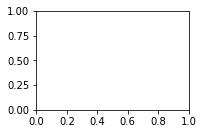

In [10]:
fig_tau = plt.figure()
ax1 = fig_tau.add_subplot(221)
ax1.plot(tau_chain50N30)
plt.title('tau50 N30')

ax2 = fig_tau.add_subplot(222)
ax2.plot(tau_chain50N30_sec)
plt.title('tau50 N30_sec')

ax3 = fig_tau.add_subplot(223)
ax3.plot(tau_chain50N15)
plt.title('tau50 N15')

ax4 = fig_tau.add_subplot(224)
ax4.plot(tau_chain50N15_sec)
plt.title('tau50 N15_sec')

plt.subplots_adjust(hspace=0.4)


#plt.plot(tau_chain200)

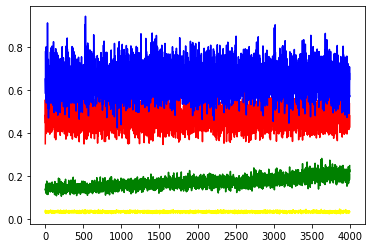

In [29]:
first_sbar_chain50N30 = np.array([to_numpy(x.sigma_bar)[0] for x in chain50N30])
plt.plot(first_sbar_chain50N30,color='red')
first_sbar_chain50N30_c50 = np.array([to_numpy(x.sigma_bar)[0] for x in chain50N30_c50])
plt.plot(first_sbar_chain50N30_c50,color='green')
first_sbar_chain50N30_c50_s95 = np.array([to_numpy(x.sigma_bar)[0] for x in chain50N30_c50_s95])
#plt.plot(first_sbar_chain50N30_c50_s95,color='purple')

last_sbar_chain50N30 = np.array([to_numpy(x.sigma_bar)[-1] for x in chain50N30])
plt.plot(last_sbar_chain50N30,color='blue')
last_sbar_chain50N30_c50 = np.array([to_numpy(x.sigma_bar)[-1] for x in chain50N30_c50])
plt.plot(last_sbar_chain50N30_c50,color='yellow')
last_sbar_chain50N30_c50_s95 = np.array([to_numpy(x.sigma_bar)[-1] for x in chain50N30_c50_s95])
#plt.plot(last_sbar_chain50N30_c50_s95,color='orange')



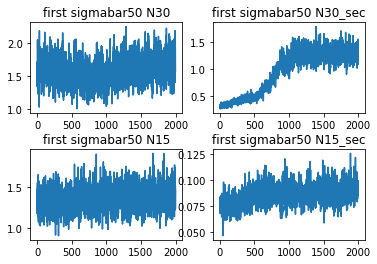

In [10]:
first_sbar_chain50N30 = np.array([to_numpy(x.sigma_bar)[0] for x in chain50N30])
first_sbar_chain50N30_sec = np.array([to_numpy(x.sigma_bar)[0] for x in chain50N30_sec])
first_sbar_chain50N15 = np.array([to_numpy(x.sigma_bar)[0] for x in chain50N15])
first_sbar_chain50N15_sec = np.array([to_numpy(x.sigma_bar)[0] for x in chain50N15_sec])

fig_sigma_first = plt.figure()
ax1 = fig_sigma_first.add_subplot(221)
ax1.plot(first_sbar_chain50N30)
plt.title('first sigmabar50 N30')

ax2 = fig_sigma_first.add_subplot(222)
ax2.plot(first_sbar_chain50N30_sec)
plt.title('first sigmabar50 N30_sec')

ax3 = fig_sigma_first.add_subplot(223)
ax3.plot(first_sbar_chain50N15)
plt.title('first sigmabar50 N15')

ax4 = fig_sigma_first.add_subplot(224)
ax4.plot(first_sbar_chain50N15_sec)
plt.title('first sigmabar50 N15_sec')

plt.subplots_adjust(hspace=0.4)
#first_sigma_bar_chain200 = np.array([to_numpy(x.sigma_bar)[0] for x in chain200])


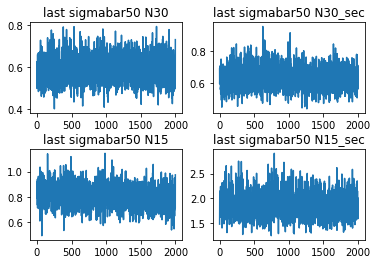

In [11]:
last_sbar_chain50N30 = np.array([to_numpy(x.sigma_bar)[-1] for x in chain50N30])
last_sbar_chain50N30_sec = np.array([to_numpy(x.sigma_bar)[-1] for x in chain50N30_sec])
last_sbar_chain50N15 = np.array([to_numpy(x.sigma_bar)[-1] for x in chain50N15])
last_sbar_chain50N15_sec = np.array([to_numpy(x.sigma_bar)[-1] for x in chain50N15_sec])

fig_sigma_last = plt.figure()
ax1 = fig_sigma_last.add_subplot(221)
ax1.plot(last_sbar_chain50N30)
plt.title('last sigmabar50 N30')

ax2 = fig_sigma_last.add_subplot(222)
ax2.plot(last_sbar_chain50N30_sec)
plt.title('last sigmabar50 N30_sec')

ax3 = fig_sigma_last.add_subplot(223)
ax3.plot(last_sbar_chain50N15)
plt.title('last sigmabar50 N15')

ax4 = fig_sigma_last.add_subplot(224)
ax4.plot(last_sbar_chain50N15_sec)
plt.title('last sigmabar50 N15_sec')

plt.subplots_adjust(hspace=0.4)#last_sigma_bar_chain200 = np.array([to_numpy(x.sigma_bar)[-1] for x in chain200])

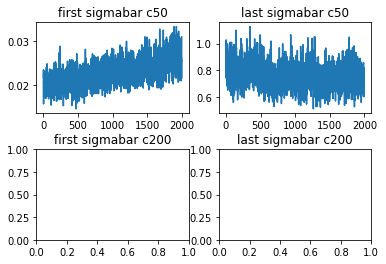

In [26]:
fig_sigma = plt.figure()
ax1 = fig_sigma.add_subplot(221)
ax1.plot(first_sigma_bar_chain50)
plt.title('first sigmabar c50')

ax2 = fig_sigma.add_subplot(222)
ax2.plot(last_sigma_bar_chain50)
plt.title('last sigmabar c50')

ax3 = fig_sigma.add_subplot(223)
#ax3.plot(first_sigma_bar_chain200)
plt.title('first sigmabar c200')

ax4 = fig_sigma.add_subplot(224)
#ax4.plot(last_sigma_bar_chain200)
plt.title('last sigmabar c200')

plt.subplots_adjust(hspace=0.4)


# evaluate performance on simulate data: return performance dataframe 

In [30]:
from scipy import stats
from sklearn.metrics import adjusted_rand_score
import pandas as pd
from math import sqrt

p = 50
d = 2
M = 4
n_percluster_s = [50]
list_performance = list()


for n_percluster in n_percluster_s:
    for N in [30]:
        chain = loadChains("data/data_by_rule_student/chains_compare_CD/chains_p_50_d_2_M_4_nperclus_{0}_N_{1}.recordio".format(n_percluster,N), MultivariateMixtureState)
        acc_rates = np.loadtxt("data/data_by_rule_student/chains_compare_CD/acc_rate_p_50_d_2_M_4_nperclus_{0}_N_{1}.csv".format(n_percluster,N), delimiter=',')

        n_cluster_chain = np.array([x.ma for x in chain])
        post_mode_nclus = stats.mode(n_cluster_chain)[0][0] # store in dataframe
        post_avg_nclus = n_cluster_chain.mean() # store in dataframe

        clus_alloc_chain = [x.clus_alloc for x in chain]
        best_clus = cluster_estimate(np.array(clus_alloc_chain))
        true_clus = np.repeat(range(M),n_percluster)
        ari_best_clus = adjusted_rand_score(true_clus, best_clus) # store in dataframe

        aris_chain = np.array([adjusted_rand_score(true_clus, x) for x in clus_alloc_chain])
        mean_aris, sigma_aris = np.mean(aris_chain), np.std(aris_chain) # store mean_aris in dataframe
        CI_aris = stats.norm.interval(0.95, loc=mean_aris, scale=sigma_aris/sqrt(len(aris_chain))) # store in dataframe

        list_performance.append([p,d,M,n_percluster,N,"no",acc_rates[0],acc_rates[1],post_mode_nclus,
                            post_avg_nclus,ari_best_clus,mean_aris,CI_aris])
        
        
df_performance = pd.DataFrame(list_performance, columns=('dim_p', 'dim_d', 'dim_M', 'dim_n_pc', 'dim_N','sec', 'means_ar','lambda_ar',
                                      'mode_nclus', 'avg_nclus', 'ari_best_clus', 'mean_ari', 'CI_ari'))
    


In [31]:
df_performance

,dim_p,dim_d,dim_M,dim_n_pc,dim_N,sec,means_ar,lambda_ar,mode_nclus,avg_nclus,ari_best_clus,mean_ari,CI_ari
0,50,2,4,50,30,no,0.237736,0.116,4,4.01675,1.0,0.999596,"(0.9994916127450891, 0.9996998396272053)"


In [23]:
df_performance

,dim_p,dim_d,dim_M,dim_n_pc,dim_N,sec,means_ar,lambda_ar,mode_nclus,avg_nclus,ari_best_clus,mean_ari,CI_ari
0,50,2,4,50,30,no,0.378893,0.144878,5,4.992667,0.993344,0.990222,"(0.9897160773499515, 0.9907270342114031)"


In [16]:
from scipy import stats
from sklearn.metrics import adjusted_rand_score
import pandas as pd
from math import sqrt

p = 50
d = 2
M = 4
n_percluster_s = [50]
list_performance = list()


for n_percluster in n_percluster_s:
    for N in [15,30]:
        chain = loadChains("data/data_by_rule_student/chains_compare_CD/chains_p_50_d_2_M_4_nperclus_{0}_N_{1}.recordio".format(n_percluster,N), MultivariateMixtureState)
        acc_rates = np.loadtxt("data/data_by_rule_student/chains_compare_CD/acc_rate_p_50_d_2_M_4_nperclus_{0}_N_{1}.csv".format(n_percluster,N), delimiter=',')

        n_cluster_chain = np.array([x.ma for x in chain])
        post_mode_nclus = stats.mode(n_cluster_chain)[0][0] # store in dataframe
        post_avg_nclus = n_cluster_chain.mean() # store in dataframe

        clus_alloc_chain = [x.clus_alloc for x in chain]
        best_clus = cluster_estimate(np.array(clus_alloc_chain))
        true_clus = np.repeat(range(M),n_percluster)
        ari_best_clus = adjusted_rand_score(true_clus, best_clus) # store in dataframe

        aris_chain = np.array([adjusted_rand_score(true_clus, x) for x in clus_alloc_chain])
        mean_aris, sigma_aris = np.mean(aris_chain), np.std(aris_chain) # store mean_aris in dataframe
        CI_aris = stats.norm.interval(0.95, loc=mean_aris, scale=sigma_aris/sqrt(len(aris_chain))) # store in dataframe

        list_performance.append([p,d,M,n_percluster,N,"no",acc_rates[0],acc_rates[1],post_mode_nclus,
                            post_avg_nclus,ari_best_clus,mean_aris,CI_aris])

        
for n_percluster in n_percluster_s:
    for N in [15,30]:
        chain = loadChains("data/data_by_rule/chains_compare_CD/chains_p_50_d_2_M_4_nperclus_{0}_N_{1}_sec.recordio".format(n_percluster,N), MultivariateMixtureState)
        acc_rates = np.loadtxt("data/data_by_rule/chains_compare_CD/acc_rate_p_50_d_2_M_4_nperclus_{0}_N_{1}_sec.csv".format(n_percluster,N), delimiter=',')

        n_cluster_chain = np.array([x.ma for x in chain])
        post_mode_nclus = stats.mode(n_cluster_chain)[0][0] # store in dataframe
        post_avg_nclus = n_cluster_chain.mean() # store in dataframe

        clus_alloc_chain = [x.clus_alloc for x in chain]
        best_clus = cluster_estimate(np.array(clus_alloc_chain))
        true_clus = np.repeat(range(M),n_percluster)
        ari_best_clus = adjusted_rand_score(true_clus, best_clus) # store in dataframe

        aris_chain = np.array([adjusted_rand_score(true_clus, x) for x in clus_alloc_chain])
        mean_aris, sigma_aris = np.mean(aris_chain), np.std(aris_chain) # store mean_aris in dataframe
        CI_aris = stats.norm.interval(0.95, loc=mean_aris, scale=sigma_aris/sqrt(len(aris_chain))) # store in dataframe

        list_performance.append([p,d,M,n_percluster,N,"yes",acc_rates[0],acc_rates[1],post_mode_nclus,
                            post_avg_nclus,ari_best_clus,mean_aris,CI_aris])


    
df_performance = pd.DataFrame(list_performance, columns=('dim_p', 'dim_d', 'dim_M', 'dim_n_pc', 'dim_N','sec', 'means_ar','lambda_ar',
                                      'mode_nclus', 'avg_nclus', 'ari_best_clus', 'mean_ari', 'CI_ari'))
    


In [17]:
df_performance

,dim_p,dim_d,dim_M,dim_n_pc,dim_N,sec,means_ar,lambda_ar,mode_nclus,avg_nclus,ari_best_clus,mean_ari,CI_ari
0,50,2,4,50,15,no,0.483343,0.129533,4,4.0490,1.0,0.999009,"(0.9987747379516979, 0.9992436186914521)"
1,50,2,4,50,30,no,0.125313,0.162367,4,4.0005,1.0,0.999461,"(0.9993440923918263, 0.9995774384593866)"
2,50,2,4,50,15,yes,0.290918,0.367233,4,4.0000,1.0,0.997194,"(0.9969334421867165, 0.997454850546528)"
3,50,2,4,50,30,yes,0.281671,0.127567,4,4.0000,1.0,0.999806,"(0.9997354757744913, 0.9998758917437948)"


# Remark: sia N30 che N15 danno stessi risultati, N15_sec non lo uso. 
N15 ha buon acceptance rate

N30 ha comunque buono acceptance rate

N30_sec ha acc rate per means più alto, però leggermente peggiore randindex

# loading and parsing CD output

In [2]:
from scipy import stats
from sklearn.metrics import adjusted_rand_score
import pandas as pd
with open("data/data_by_rule_student/alloc_matrix_CD/alloc_matrix_p50_d2_prec05.csv", newline='') as my_csv:
    alloc_matrix = pd.read_csv(my_csv, sep=',', header=None).values


In [9]:
import numpy as np
from math import sqrt
p = 50
d = 2
M = 4
n_percluster = 50

list_performance = list()
n_cluster_chain_CD = np.array([len(np.unique(alloc_matrix[i,:])) for i in range(alloc_matrix.shape[0])])
post_mode_nclus_CD = stats.mode(n_cluster_chain_CD)[0][0] # store in dataframe
post_avg_nclus_CD = n_cluster_chain_CD.mean() # store in dataframe

best_clus_CD = cluster_estimate(alloc_matrix)
true_clus = np.repeat(range(M),n_percluster)
ari_best_clus_CD = adjusted_rand_score(true_clus, best_clus_CD) # store in dataframe

aris_chain_CD = np.array([adjusted_rand_score(true_clus, alloc_matrix[i,:]) for i in range(alloc_matrix.shape[0])])
mean_aris_CD, sigma_aris_CD = np.mean(aris_chain_CD), np.std(aris_chain_CD) # store mean_aris in dataframe
CI_aris_CD = stats.norm.interval(0.95, loc=mean_aris_CD, scale=sigma_aris_CD/sqrt(len(aris_chain_CD))) # store in dataframe
list_performance.append([p,d,M,n_percluster,post_mode_nclus_CD,
                            post_avg_nclus_CD,ari_best_clus_CD,mean_aris_CD,CI_aris_CD])

df_performance_CD = pd.DataFrame(list_performance, columns=('dim_p', 'dim_d', 'dim_M', 'dim_n_pc','mode_nclus', 'avg_nclus', 'ari_best_clus', 'mean_ari', 'CI_ari'))
    

In [10]:
df_performance_CD

,dim_p,dim_d,dim_M,dim_n_pc,mode_nclus,avg_nclus,ari_best_clus,mean_ari,CI_ari
0,50,2,4,50,5,5.693,0.969063,0.945863,"(0.9433891772082617, 0.9483371304864037)"


In [24]:
cou

array([1, 1, 3, 1, 1])